<a href="https://colab.research.google.com/github/singhbhupender1/ML-notebooks/blob/master/Image_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Deep learning on Image data using Keras

In [4]:
!pip install pip
!pip install pillow

##Preparing image data

In [14]:
#example of pixel normalization
#asarray to convert image to numerical array data
from numpy import asarray
#PIL is image handling library in python
from PIL import Image
#urllib to access download image from url
from urllib.request import urlopen
#load image
url = 'https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/01/bondi_beach.jpg'
image = Image.open(urlopen(url))
pixels = asarray(image)
#confirm pixel range is 0-255
print('Data type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
#convert from intergers to floats
pixels = pixels.astype('float32')
#normalize to the range 0-1
pixels /= 255.0
#confirm the normalization
print('Min:%.3f, Max:%.3f' % (pixels.min(), pixels.max()))

Data type: uint8
Min: 0.000, Max: 255.000
Min:0.000, Max:1.000


##CNN##
##Convolutional Layers##


**A convolution is the simple application of a filter to an input that results in an activation. Repeated application of the same filter to an input results in a map of activations called a *feature map*, indicating the locations and strength of a detected feature in an input, such as an image.
A convolutional layer can be created by specifying both the number of filters to learn and the fixed size of each filter, often called the *kernel shape*.**

##Pooling Layers##

**Pooling layers provide an approach to downsampling feature maps by summarizing the presence of features in patches of the feature map.
Maximum pooling, or max pooling, is a pooling operation that calculates the maximum, or largest, value in each patch of each feature map.**

##Classifier Layer##

##Convolutional Neaural Network##

**The example below creates a convolutional neural network that expects grayscale images with the square size of 256×256 pixels, with one convolutional layer with 32 filters, each with the size of 3×3 pixels, a max pooling layer, and a binary classification output layer.**

In [15]:
#cnn with single convolutional, pooling and output layers
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
#create model
model = Sequential()
#add convolutional Layer
model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 1)))
model.add(MaxPooling2D())
##flatten layer tranforms the feature map matrix to a single column
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
#provides detail of the model layers
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 516128)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 516129    
Total params: 516,449
Trainable params: 516,449
Non-trainable params: 0
_________________________________________________________________


##Image *Classification*

**The example below uses the VGG-16 pre-trained model to classify photographs of objects into one of 1,000 known classes.**

In [1]:
#example of using a pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from urllib.request import urlopen
#load an image from url
url = 'https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/dog.jpg'
image = load_img(urlopen(url), target_size=(224, 224))
#convert the image pixels to a numpy array
image = img_to_array(image)
#reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
#prepare the image for the VGG model
image = preprocess_input(image)
#load the model
model = VGG16()
#predict the probability across all output classes
yhat = model.predict(image)
#convert the probailities to class labels
label = decode_predictions(yhat)
#retrieve the most likely results e.g highest prbability
label = label[0][0]
#print the classifications
print('%s (%.2f%%)' % (label[1], label[2]*100))


Using TensorFlow backend.






553467904/553467096 [==============================] - 20s 0us/step






40960/35363 [==================================] - 0s 0us/step
Doberman (33.59%)


##Train image classification Model

In [6]:
#fit a cnn on the fashion mnist dataset
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
#load dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
#reshape dataste to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
#convert from integers to float
trainX, testX = trainX.astype('float32'), testX.astype('float32')
#normalise to range 0-1
trainX, testX = trainX / 255.0, testX / 255.0
#one hot encode target values
trainY , testY = to_categorical(trainY), to_categorical(testY)
#define model
model = Sequential()
#he_uniform :It draws samples from a uniform distribution within [-limit, limit] 
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['accuracy'])
#fit model
model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=2)
#evalute model
loss, acc = model.evaluate(testX, testY, verbose = 0)
print(loss, acc)

Epoch 1/10
 - 38s - loss: 0.3639 - acc: 0.8688
Epoch 2/10
 - 37s - loss: 0.2404 - acc: 0.9113
Epoch 3/10
 - 37s - loss: 0.1985 - acc: 0.9257
Epoch 4/10
 - 37s - loss: 0.1651 - acc: 0.9387
Epoch 5/10
 - 37s - loss: 0.1402 - acc: 0.9479
Epoch 6/10
 - 37s - loss: 0.1168 - acc: 0.9573
Epoch 7/10
 - 37s - loss: 0.0997 - acc: 0.9629
Epoch 8/10
 - 38s - loss: 0.0830 - acc: 0.9693
Epoch 9/10
 - 37s - loss: 0.0696 - acc: 0.9742
Epoch 10/10
 - 37s - loss: 0.0603 - acc: 0.9782
0.33848152996599673 0.9104


##Image Augmentation

**Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.
The Keras deep learning neural network library provides the capability to fit models using image data augmentation via the *ImageDataGenerator* class.**

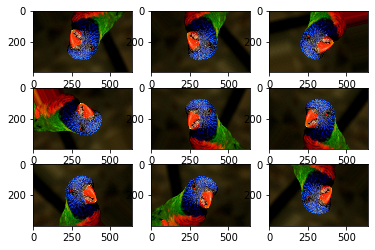

In [8]:
#example of image augmentation in keras
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
from urllib.request import urlopen
url = 'https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/01/bird.jpg'
img = load_img(urlopen(url))
#convert to numpy array
data = img_to_array(img)
#expand dimesnion to one sample
samples = expand_dims(data, 0)
#create image data augmentation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
#prepare iterator
it = datagen.flow(samples, batch_size=1)
#generate samples and plot
for i in range(9):
    #define subplot
    plt.subplot(330 +1 +i)
    #generate batch of images
    batch = it.next()
    #conver to unsigned intergers for viewing
    image = batch[0].astype('uint32')
    #plot raw pixel data
    plt.imshow(image)
#show the figure
plt.show()

##Face detection 

In [9]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 9.5MB/s 


**The example below will load the photograph and use the MTCNN model to detect faces and will plot the photo and draw a box around the first detected face.**

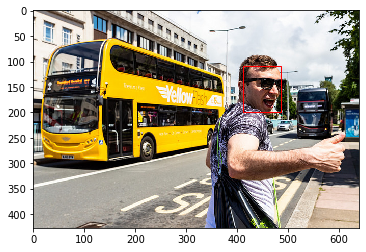

In [13]:
#face detection with mtcnn on a photgraph
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
from urllib.request import urlopen
#load image from file
url = 'https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/street.jpg'
pixels = plt.imread('/content/street.jpg')
#create detector using default weights
detector = MTCNN()
#Detect faces in the image
faces = detector.detect_faces(pixels)
#plot the image
plt.imshow(pixels)
#get the context for drawing boxes
ax = plt.gca()
#get coordinates from the first place
x, y, width, height = faces[0]['box']
#create the shape
rect = Rectangle((x, y), width, height, fill=False, color ='red')
#draw the box
ax.add_patch(rect)
#show the plot
plt.show()